In [1]:
import os
import numpy as np
import re
import csv
import time
import operator
import matplotlib.pyplot as plt

from nltk import sent_tokenize
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from matplotlib import style
style.use("ggplot")



In [2]:


# Obtain filenames and sort them by name

path = '/home/student/ThesisData/IEEE_data_v0.2/'
filenames = []
for filename in os.listdir(path):
    filenames.append(filename)

path2 = '/home/student/ThesisData/Indeed_data_v0.0/'
filenames2 = []
for filename in os.listdir(path2):
    filenames2.append(filename)
    
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    """
    l.sort(key=alphanum_key)

sort_nicely(filenames)
sort_nicely(filenames2)

In [3]:
len(filenames)

250

In [3]:

# Calculate the amount unique words in the corpus
# Approx: 6987 unique words
def removegarbage(text):
    text=re.sub(r'\W+',' ',text)
    text=text.lower()
    return text

lent = 0
counter =Counter()
for filename in filenames:
    with open(path + filename, 'r') as f:
        words = set(removegarbage(f.read()).split()) 
        counter.update(words)
        f.close()
# for filename in filenames2:
#     with open(path2 + filename, 'r') as g:
#         words = set(removegarbage(g.read()).split())
#         counter.update(words)
#         g.close()
print(len(counter))

6987


In [4]:
# counter

In [8]:
# # test = []
# # for filename in filenames:
# #     with open(path + filename, 'r') as f:
# #         x = f.read().split()
# #         test.append(x)
        

# # Old type of sentence splitting, made mistakes: Took whole paraghraps as one sentence
# # sentdict = dict()
# # for i in range(len(filenames)):
# #     with open(path + filenames[i], 'r') as f:
# #         text = f.read().lower()
# #         f.close()
# #         sentdict[i] = sent_tokenize(text)
# # for j in range(len(filenames2)):
# #     with open(path2 + filenames2[j], 'r') as g:
# #         text = g.read().lower()
# #         g.close()
# #         sentdict[j + len(filenames)] = sent_tokenize(text)


# # Only IEEE dataset
# # Improved sentences, no mistakes will be made
# sentdictionary = dict()
# for i in range(len(filenames)):
#     with open(path + filenames[i], 'r') as f:
#         text = f.read().lower()
#         f.close()
#         sentdictionary[i] = re.split(r"(?<!^)\s*[.\n]+\s*(?!$)", text)
        
# # Indeed files (To use or not to use)
# # for j in range(len(filenames2)):
# #     with open(path2 + filenames2[j], 'r') as g:
# #         text = g.read().lower()
# #         g.close()
# #         sentdictionary[j + len(filenames)] = re.split(r"(?<!^)\s*[.\n]+\s*(?!$)", text)



# For Indeed sentences split         
# for j in range(len(filenames), len(filenames2)+len(filenames)-1):
#     for sentence in sentdictionary[j]:
#         sent = []
#         sent.append(sentence)
#         sentences.append(sent)
# print(len(sentences))

# Not needed:
# Removing punctuation
# testsent = realsentences[3]
# testsent
# exclude =(string.punctuation)
# punct = []
# for i in exclude: 
#     if i != '+' and i != '.' and i != ',':
#         punct.append(i)
# # print(punct)

# def remove_punc(word, punct):
#     x ''.join(char for char in word if char not in punct)

# # from string import maketrans
# s1 = 'I have learned, c++ jo!'
# # s1 = string.maketrans(s1, string.punctuation)
# # print(s1)
# sss = remove_punc(testsent, punct)
# print(sss)

In [5]:
# Only IEEE dataset
# Improved sentences, no mistakes will be made
sentdictionary = dict()
for i in range(len(filenames)):
    with open(path + filenames[i], 'r') as f:
        text = f.read().lower()
        f.close()
        sentdictionary[i] = re.split(r"(?<!^)\s*[.\n]+\s*(?!$)", text)
        

In [6]:
# Split files into sentences
# Prepare them for Word2Vec model
sentences = []
for i in range(len(filenames)):
    for sentence in sentdictionary[i]:
        sent = []
        sent.append(sentence)
        sentences.append(sent)
print(len(sentences))

        
# Example of one tokenized sentence
tokens = word_tokenize(sentences[0][0])
print(tokens)

realsentences = []
for sentence in sentences:
    tokens = word_tokenize(sentence[0])
    realsentences.append(tokens)

11561
['software', 'engineer', '-', 'embedded', 'c++', 'at', 'schweitzer', 'engineering', 'laboratories', ',', 'inc']


In [79]:
word_vectors.most_similar('machine')

[('learning', 0.9810550212860107),
 ('vision', 0.883319616317749),
 ('statistical', 0.8498011827468872),
 ('natural', 0.8474116921424866),
 ('processing', 0.8440963625907898),
 ('signal', 0.8281561136245728),
 ('artificial', 0.8218076229095459),
 ('libraries', 0.818049430847168),
 ('deep', 0.8150893449783325),
 ('mining', 0.7957593202590942)]

### After file preparation
Now that we have prepared the files to be taken as input for a word embedding model, the word embedding model will be build using Gensim. To represent and visualise the vectors for gaining a better intuition, the vectors need to be transformed from 100 dimensions to 2 dimension. To do so, the PCA algorithm will be used.

In [20]:
# Create Word embedding model

model = Word2Vec(realsentences,window=8, min_count=2)
W = model[model.wv.vocab]

/home/student/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [21]:
t = time.time()

model.train(realsentences, total_examples=model.corpus_count, epochs=6)


elapsed = time.time() - t


In [10]:
model.wv.vocab['python']

In [22]:
# Find most similar words to a certain word
word_vectors = model.wv
# word_vectors.most_similar(['use','engineering'])
word_vectors.most_similar(['big'])

[('analytics', 0.9094992876052856),
 ('data', 0.8907195329666138),
 ('mining', 0.8426224589347839),
 ('visualization', 0.8144789934158325),
 ('artificial', 0.7830331325531006),
 ('cryptography', 0.775590181350708),
 ('germane', 0.7723228931427002),
 ('retrieval', 0.7658373117446899),
 ('intelligence', 0.7545607089996338),
 ('structures', 0.7459909319877625)]

In [16]:
word_vectors.similarity('java','python')

0.9834727092261737

In [50]:
# model.wv.save_word2vec_format('model.bin')

In [153]:
model.save('model2')

In [80]:
model = Word2Vec.load('model2.bin')

In [30]:
# import gensim
# model2 = gensim.models.KeyedVectors.load_word2vec_format('/home/student/Downloads/GoogleNews-vectors-negative300.bin', binary=True)

In [29]:
# model2.most_similar('Hello')

In [361]:
# wvec = model2.wv

In [31]:
# wvec.most_similar(['Hi'])

In [385]:
model.corpus_count

11561

In [23]:
word_vectors.similarity('artificial', 'intelligence')

0.7782336842697848

In [41]:
W[0]

array([-0.04289517, -0.0017    , -0.00808634,  0.02517835, -0.01659117,
        0.02557709, -0.01827133,  0.01760406, -0.00310296, -0.00672812,
       -0.00676941, -0.01385062, -0.01051252, -0.01694222, -0.00302732,
       -0.00037057,  0.010276  , -0.05514655, -0.00833856,  0.00789288,
       -0.025087  , -0.02143063,  0.00965378,  0.00847906, -0.02943526,
       -0.00276447,  0.00440252,  0.06950812,  0.02804142,  0.03425802,
       -0.00408428, -0.00922165, -0.00914163, -0.03058388,  0.00797777,
       -0.0110561 ,  0.00551466, -0.01683483,  0.03973106,  0.03724447,
       -0.02778918, -0.00498912, -0.03833133,  0.0190645 ,  0.00349394,
        0.00264335, -0.01666214,  0.02972999,  0.04716251,  0.01260301,
        0.00646659,  0.01823759, -0.01095156, -0.02821981, -0.06442167,
        0.01586319, -0.01537327, -0.00630606, -0.00030943, -0.009971  ,
       -0.02089343, -0.01006093,  0.00689636,  0.01535747, -0.00162343,
        0.0467913 ,  0.010113  ,  0.05476855, -0.03786293,  0.03

No handles with labels found to put in legend.


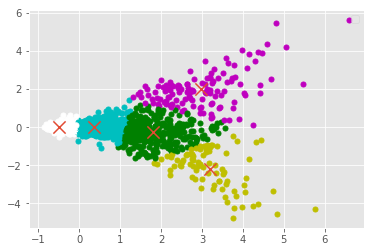

<Figure size 3200x1800 with 0 Axes>

In [73]:
# Transform vectors to 2-dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(W)
result_np = np.array(result)

kmeans = KMeans(n_clusters = 5)
kmeans.fit(result_np)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# print(centroids)
# print(labels)

colors = ["g.","w.","c.","y.", "m."]
word1 = ''
word2 = ''
word3 = ''
word4 = ''
word5 = ''
for i in range(len(result_np)):
#     print("coordinate:",result_np[i], "label:", labels[i])
    plt.plot(result_np[i][0], result_np[i][1], colors[labels[i]], markersize = 10)
    if result_np[i][0] == centroids[0][0] and result_np[i][1] == centroids[0][1]:
        word1 = W[i]
    if result_np[i][0] == centroids[0][0] and result_np[i][1] == centroids[1][1]:
        word2 = W[i]
    if result_np[i][0] == centroids[0][0] and result_np[i][1] == centroids[2][1]:
        word3 = W[i]
    if result_np[i][0] == centroids[0][0] and result_np[i][1] == centroids[3][1]:
        word4 = W[i]
    if result_np[i][0] == centroids[0][0] and result_np[i][1] == centroids[4][1]:
        word5 = W[i]
words = [word1, word2, word3, word4, word5]
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.annotate(word1, xy=(centroids[0][0], centroids[0][1]))
plt.annotate(word2, xy=(centroids[1][0], centroids[1][1]))
plt.annotate(word3, xy=(centroids[2][0], centroids[2][1]))
plt.annotate(word4, xy=(centroids[3][0], centroids[3][1]))
plt.annotate(word5, xy=(centroids[4][0], centroids[4][1]))
plt.legend()
plt.figure(figsize=(16,9), dpi=200)
plt.savefig('KMeans5.png', dpi=200)
plt.show()

# plt.scatter(result[:, 0], result[:, 1],color = 'red')
# words = list(model.wv.vocab)
# for i, word in enumerate(taxonomy):
#     plt.annotate(word, xy=(result[i, 0], result[i, 1]))
# plt.axis([-.8,.25,-0.25,.8])
# plt.show()

In [54]:
print(centroids[0][0])
words = list(model.wv.vocab)
print(labels[160])
# # for i, word in enumerate(taxonomy):
# plt.annotate(word, xy=(centroids[0][0], centroids[0][1]))
# plt.annotate(word, xy=(centroids[1][0], centroids[1][1]))
# plt.annotate(word, xy=(centroids[2][0], centroids[2][1]))
# plt.annotate(word, xy=(centroids[3][0], centroids[3][1]))
# plt.annotate(word, xy=(centroids[4][0], centroids[4][1]))
# # plt.axis([-.8,.25,-0.25,.8])
# plt.show()

0.3468149
1


In [30]:
# Some test Taxonomy
taxonomy =  ['python', 'data']

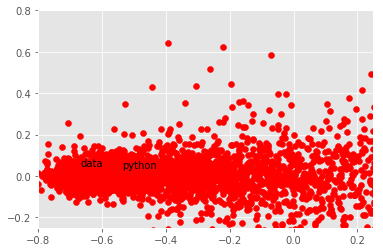

In [79]:
# Transform vectors to 2-dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(W)

plt.scatter(result[:, 0], result[:, 1],color = 'red')
words = list(model.wv.vocab)
for i, word in enumerate(taxonomy):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.axis([-.8,.25,-0.25,.8])
plt.show()

IndexError: index 4873 is out of bounds for axis 0 with size 4873

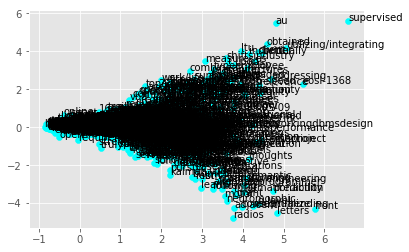

In [40]:
plt.scatter(result[:, 0], result[:, 1],color = 'cyan')
words = list(model.wv.vocab)
i=0
for word in words:
    i+=1
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.axis([-1,1,-.3,.1])
plt.show()

In [289]:
# x = 0
# for file in filenames:
#     x+=1
#     with open(path + file) as f:
#         text = f.read()
#         test = [line.strip() for line in text.splitlines()]
#         if x == 2:
#             break
        

In [21]:
# sentdictionary = dict()
# for i in range(len(filenames)):
#     with open(path + filenames[i], 'r') as f:
#         text = f.read().lower()
#         f.close()
#         sentdictionary[i] = re.split(r"(?<!^)\s*[.\n]+\s*(?!$)", text)
# for j in range(len(filenames2)):
#     with open(path2 + filenames2[j], 'r') as g:
#         text = g.read().lower()
#         g.close()
#         sentdictionary[j + len(filenames)] = re.split(r"(?<!^)\s*[.\n]+\s*(?!$)", text)


In [80]:
# print(counter['datasets'])
print(word_vectors.most_similar('accuracy'))

[('creating', 0.9129372835159302), ('direction', 0.9095286130905151), ('manage', 0.9049052000045776), ('appropriate', 0.9040015935897827), ('coordinate', 0.9014795422554016), ('changes', 0.900469958782196), ('completeness', 0.9001034498214722), ('cgsn', 0.8991155624389648), ('provides', 0.8988227844238281), ('improvements', 0.8964195251464844)]


## Taxonomy
Individual competencies per competence groups

In [24]:
# Data Science Analytics competence requirements
DSDA  = ['data analytics', 'statistical techniques', 'mathematics/statistics', 'discover new relations', 'deliver insights', 'research problem', 'decision-making']
DSDA1 = ['data analytics techniques', 'machine learning','deep learning', 'supervised learning', 'unsupervised learning', 'data mining','nlp', 'predictive analytics','analysis', 'complex data analysis']
DSDA2 = ['apply quantitative techniques', 'statistics', 'calculus', 'time analysis', 'optimization', 'simulation deploy']
DSDA3 = ['identify', 'extract', 'heterogeneous data', 'modern data source', 'social media data', 'open data']
DSDA4 = ['understand performance metrics', 'understand accuracy metrics', 'use performance', 'model validation', 'testing', 'information retrieval']
DSDA5 = ['develop data analytics', 'organizational tasks', 'integrate data analytics', 'agile decisions']
DSDA6 = ['visualization results','critical thinking', 'design', 'evaluate', 'evaluating methods']

# DSDA_comp = [DSDA, DSDA1, DSDA2, DSDA3, DSDA4, DSDA5, DSDA6]
DSDA_comp = {0 : DSDA, 1 : DSDA1, 2 : DSDA2, 3 : DSDA3, 4 : DSDA4, 5 : DSDA5, 6 : DSDA6}

In [25]:
# Data Science Engineering competence requirements
DSENG  = ['engineering principles', 'modern computer technologies', 'research', 'design', 'implement data analytics', 'implement applications', 'develop experiments', 'develop processes', 'develop instruments']
DSENG1 = ['engineering principles', 'research', 'design applications', 'design instruments', 'design applications', 'develop instruments', 'implement instruments', 'implement applications', 'data collection', 'data storage']
DSENG2 = ['develop computational solutions', 'apply computational solutions', 'wide range', 'data analytics platforms', 'big data technologies', 'cloud based']
DSENG3 = ['develop data analysis applications', 'develop tools', 'parallel processing', 'cluster processing', 'cloud based solutions', '']
DSENG4 = ['develop data storage', 'deploy data storage', 'operate data storage', 'hadoop', 'hbase', 'mongodb']
DSENG5 = ['apply security mechanisms', 'apply security controls', 'data processing', 'data privacy', 'protection']
DSENG6 = ['develop relational databases', 'relational databases', 'build relational databases', 'deploy relational databases', 'sql', 'etl','large datasets']

# DSENG_comp = [DSENG, DSENG1, DSENG2, DSENG3, DSENG4, DSENG5, DSENG6]
DSENG_comp = {0 : DSENG, 1 : DSENG1, 2 : DSENG2, 3 : DSENG3, 4 : DSENG4, 5 : DSENG5, 6 : DSENG6}

In [26]:
# Data Science Management competence requirements
DSDM  = ['develop data management', 'implement data management', 'strategy data collection', 'strategy data storage']
DSDM1 = ['develop data strategy', 'implement data strategy','data management policy', 'data management plan']
DSDM2 = ['develop relevant data models', 'implement relevant data models', 'common standards']
DSDM3 = ['integrate heterogeneous data', 'provide heterogeneous data', 'further analysis']
DSDM4 = ['maintain information', 'data handling', 'reference data', 'relevant data sources']
DSDM5 = ['data quality', 'data interoperability', 'compliance standards', 'compliance publication']
DSDM6 = ['develop policies', 'manage policies', 'data protection policies','ethical issues']
DSDM_comp = {0 : DSDM, 1 : DSDM1, 2 : DSDM2, 3 : DSDM3, 4 : DSDM4, 5 : DSDM5, 6 : DSDM6}

In [27]:
# Research Methods and Project Management competence requirements
DSRM  = ['create new understanding', 'create new capabilities', 'scientific method','discover new approaches','create new knowledge','achieve research goals']
DSRM1 = ['create new understanding', 'using research methods', 'experiment', 'evaluation','training','testing']
DSRM2 = ['direct systematic study','understanding observation','discover new approaches','achieve research goals','achieve goals']
DSRM3 = ['domain research model', 'identify data','identify research questions','identify objectives','formulate sound']
DSRM4 = ['perform creative work', 'systematic investigation', 'systematic experimentation', 'discover knowledge','adjust knowledge','derive new applications', 'contribute development']
DSRM5 = ['design experiments', 'data collection', 'not active collection', 'active collection', 'testing', 'problem solving']
DSRM6 = ['develop data driven projects', 'guide data driven projects', 'project planning', 'experiment design', 'data collection', 'handling']
DSRM_comp = {0 : DSRM, 1 : DSRM1, 2 : DSRM2, 3 : DSRM3, 4 : DSRM4, 5 : DSRM5, 6 : DSRM6}

In [28]:
# Domain related Competences (DSDK): Applied to Business Analytics
DSBA  = ['use domain knowledge', 'develop data analytics applications', 'use data science methods', 'domain specific data types', 'domain specific presentations']
DSBA1 = ['information needs', 'assess existing data', 'propose new data', 'identify new data', 'business context','achieve goal', 'social network source', 'open network sources']
DSBA2 = ['operational concepts', 'enable key performance', 'validate business analysis', 'identify potential challenges', 'assess potential challenges']
DSBA3 = ['business focused analysis', 'methods tools', 'identify business impact trends', 'make business case',  'data analysis', 'identified trends']
DSBA4 = ['opportunity', 'propose data', 'process optimization']
DSBA5 = ['customer relations', 'optimize data', 'interaction user groups', 'specific business sectors']
DSBA6 = ['multiple datasets', 'marketing purposes', 'identify effective strategy', 'marketing actions']
DSDK_comp = {0 : DSBA, 1 : DSBA1, 2 : DSBA2, 3 : DSBA3, 4 : DSBA4, 5 : DSBA5, 6 : DSBA6}

In [29]:
dictionaries = [DSDA_comp, DSENG_comp, DSDM_comp, DSRM_comp, DSDK_comp]

In [83]:
# word_vectors.doesnt_match('data big machine learning radio artificial'.split())
word_vectors.most_similar('machine')

[('learning', 0.9810550212860107),
 ('vision', 0.883319616317749),
 ('statistical', 0.8498011827468872),
 ('natural', 0.8474116921424866),
 ('processing', 0.8440963625907898),
 ('signal', 0.8281561136245728),
 ('artificial', 0.8218076229095459),
 ('libraries', 0.818049430847168),
 ('deep', 0.8150893449783325),
 ('mining', 0.7957593202590942)]

In [30]:
# This was done to see if there are spellings mistakes in the competence groups

for dictionaryy in dictionaries:
    for key, comp in dictionaryy.items():
        for sent in comp:
            for word in sent.split():
                if word not in word_vectors:
                    print(word)
                    print(key)

In [31]:
word_vectors.similarity('intel','data')

0.6559861417596633

In [226]:
s = sum(word_vectors['maintain', 'historical','information'])
x = sum(word_vectors['use', 'data','analytics'])
'maintain historical information'
y = sum(word_vectors['use', 'engineering', 'principles'])

np.atleast_2d(x)
cosine_similarity(np.atleast_2d(x),np.atleast_2d(y))[0][0]

0.62149155

In [248]:
# len(sentdictionary)
word_vectors.vocab


{'52': <gensim.models.keyedvectors.Vocab at 0x7f94541a2cf8>,
 'verbeterinitiatieven': <gensim.models.keyedvectors.Vocab at 0x7f945546def0>,
 'improve': <gensim.models.keyedvectors.Vocab at 0x7f94541a2d68>,
 'vertaalt': <gensim.models.keyedvectors.Vocab at 0x7f945546d550>,
 'datavibes': <gensim.models.keyedvectors.Vocab at 0x7f944c63fc18>,
 'nielsen': <gensim.models.keyedvectors.Vocab at 0x7f944c63f2b0>,
 'classified': <gensim.models.keyedvectors.Vocab at 0x7f94541a2e10>,
 'bitbucket': <gensim.models.keyedvectors.Vocab at 0x7f94541924e0>,
 'attach': <gensim.models.keyedvectors.Vocab at 0x7f944c63fb00>,
 'mooi': <gensim.models.keyedvectors.Vocab at 0x7f944c63ffd0>,
 'werktijden': <gensim.models.keyedvectors.Vocab at 0x7f94541a2e48>,
 'independent': <gensim.models.keyedvectors.Vocab at 0x7f944c63f240>,
 'server': <gensim.models.keyedvectors.Vocab at 0x7f944c63f550>,
 'validation': <gensim.models.keyedvectors.Vocab at 0x7f945417fda0>,
 'design/development': <gensim.models.keyedvectors.Voca

In [33]:
# This will do the classifying when completed
def check_family(dictionary):
    for i in range(len(dictionary)):
        document = dictionary[i]
        for line in document:
            for word in document


SyntaxError: invalid syntax (<ipython-input-33-22c16e44eadb>, line 6)

In [216]:
# This prints all words in the model that arent just letters

# # word_vectors.most_similar(positive=[''])
# # word_vectors.similarity('experiments', 'experiment')
# x = word_vectors.vocab
# for key in x:
#     if key.isalpha() != True:
#         print(key)
        

In [357]:
print(DSDM[0].split())
for word in DSDM[0].split():
#     print(word)
    x += word_vectors[word]

['develop', 'data', 'management']


In [218]:
# testtext

In [219]:
# testtext = sentdictionary[1]
# testtext[0].split()
# # for line in testtext:
# #     print(line)
# #     print(' ')

## Code
This calculates the results step by step.
First all sentences of a given job post will be transformed into vectors.
Then all the competencies will be transformed into vectors.

Then similarity will be calculated and percentages will be calculated.

In [32]:
# The reason why I dont take full line length, is because not every
# word in the line is in the model.
# This function tranfsorms every sentence of a textfile to a vector that
# represents the meaning of the sentence according to the model u give it

# This returns a dictionary for a certain text where every sentence has
# been transformed to a vector that represents the sentence's meaning.
def sentence_meaning(textNumber, dictionary, model, nfeatures):
    sentence_meanings = []
    vector_dict = dict()
    text = dictionary[textNumber]
    for line in text:
        line_length = 0
        vector = np.zeros(nfeatures, dtype='float32')
        for word in line.split():
            if word in model:
                line_length += 1
                vector += model[word]
        if np.all(vector==0) != True:
            vector = vector / line_length
            sentence_meanings.append(vector)
    vector_dict[textNumber] = sentence_meanings
    return vector_dict
# competence_sim(testtext, word_vectors, 100)


# This function transforms all individual competencies to vector
# representation which contanis the meanings of the individual competencies
# Works very fast even with 3 for-loops
def competence_meaning(comp_group, model, nfeatures):
    competence_dict = {}
    # 6 individual competencies per competence group
    # DSDA, DSDA1, DSDA2 ... etc.
    for key, comp in comp_group.items():
        competence_meanings = []
        comp_length = 0
        # Total of 6 - 10 sentences
        for sentences in comp:
            vector = np.zeros(nfeatures, dtype='float32')
            # 2 or 3 words
            for word in sentences:
                if word in model:
                    comp_length += 1
                    vector += model[word]
            vector = vector / comp_length
            competence_meanings.append(vector)
        competence_dict[key] = competence_meanings
    return competence_dict
    

            

In [391]:
# Calculate similarties per comp group per text
def competence_similarity(text, model, nfeatures):
    sentences = sentence_meaning(textNumber, dictionary, model, nfeatures)
    competencies = competence_meaning(comp_group, model, nfeatures)
    

In [43]:
# Test sentence_meaning():
sentence_vectors = [sentence_meaning(num, sentdictionary, word_vectors, 100) for num in range(len(filenames))]

# Individual competencies meanings:
competence_vectors = [competence_meaning(dictionary_comp, word_vectors, 100) for dictionary_comp in dictionaries]

In [44]:
x = sentence_vectors[0]

len(x[0])


# first = sentence_vectors[5]
# print(coun)

54

In [394]:
# sentdictionary[3]

In [395]:
# word_vectors.most_similar('')

In [398]:
testdictionary1 = dict()
# for i in range(5):
#     testdictionary1['hi'] += 1
# testdictionary1['hi']

In [34]:


def get_max(dictionary):
    return max(dictionary.items(), key=operator.itemgetter(1))[0]

In [35]:
#This provides the similarity results

def calculate_results(sentences, competencies, threshhold):
    text_class = dict()
    sixth_group = dict()
    
    
    comp = []
    for file_id in range(len(sentences)):
        another_dict = {0:0,1:0,2:0,3:0,4:0}
        sentence_number = 0
        for sentence_vec in sentences[file_id][file_id]:
            sentence_number += 1
            comp_dict = dict()
            for comp_group in range(len(competencies)):
                similarity = 0
                count = 0
                for individual_comp in range(len(competencies[comp_group])):
#                     competencies[comp][individual_comp]
                    comp = np.atleast_2d(competencies[comp_group][individual_comp])
                    sent = np.atleast_2d(sentence_vec)
                    cosine = cosine_similarity(comp, sent)[0][0]
                    if cosine > threshhold:
                        similarity += cosine
                        count += 1
                if count != 0:
                    similarity = similarity / count
                    sixth_group[(file_id, sentence_number)] = False
                else:
                    sixth_group[(file_id, sentence_number)] = True
                    similarity = similarity
                comp_dict[comp_group] = similarity

            another_dict[get_max(comp_dict)] += 1
        
        text_class[file_id] = (another_dict)
    return text_class, sixth_group
        
  

In [45]:
calc = calculate_results(sentence_vectors, competence_vectors, (0.55))

In [139]:
resultsdict2 = {}
t = time.time()
for i in range(50,76,5):
    final_results2 = calculate_results(sentence_vectors, competence_vectors, (i/100))
    resultsdict2[i] = final_results2
elapsed4 = time.time() - t    

In [151]:
resultsdict2

{60: ({0: {0: 33, 1: 5, 2: 11, 3: 0, 4: 5},
   1: {0: 17, 1: 3, 2: 21, 3: 0, 4: 10},
   2: {0: 17, 1: 1, 2: 11, 3: 2, 4: 4},
   3: {0: 17, 1: 0, 2: 12, 3: 1, 4: 6},
   4: {0: 22, 1: 3, 2: 18, 3: 1, 4: 5},
   5: {0: 17, 1: 4, 2: 22, 3: 1, 4: 6},
   6: {0: 10, 1: 1, 2: 0, 3: 0, 4: 3},
   7: {0: 19, 1: 1, 2: 4, 3: 2, 4: 6},
   8: {0: 10, 1: 1, 2: 3, 3: 0, 4: 3},
   9: {0: 17, 1: 0, 2: 18, 3: 0, 4: 4},
   10: {0: 17, 1: 4, 2: 22, 3: 1, 4: 6},
   11: {0: 19, 1: 6, 2: 9, 3: 4, 4: 5},
   12: {0: 34, 1: 2, 2: 12, 3: 0, 4: 5},
   13: {0: 10, 1: 1, 2: 16, 3: 1, 4: 4},
   14: {0: 25, 1: 5, 2: 22, 3: 0, 4: 13},
   15: {0: 29, 1: 3, 2: 22, 3: 0, 4: 4},
   16: {0: 24, 1: 3, 2: 33, 3: 3, 4: 9},
   17: {0: 18, 1: 1, 2: 15, 3: 0, 4: 2},
   18: {0: 18, 1: 1, 2: 17, 3: 3, 4: 7},
   19: {0: 15, 1: 1, 2: 5, 3: 1, 4: 6},
   20: {0: 8, 1: 0, 2: 9, 3: 0, 4: 4},
   21: {0: 20, 1: 1, 2: 22, 3: 3, 4: 3},
   22: {0: 32, 1: 4, 2: 40, 3: 0, 4: 11},
   23: {0: 25, 1: 6, 2: 14, 3: 2, 4: 8},
   24: {0: 33, 1: 2, 2: 23

In [405]:
elapsed2
#12 minutes

756.2879350185394

In [572]:
elapsed2

372.3458902835846

In [94]:
elapsed2

416.02565717697144

In [95]:
sentdictionary[107][45]

'engineering'

In [476]:
for unseen in unseendict.values():
    print(unseen)
    print(' ')
    print(len(unseendict.values()))
    break

candidate must have 3 or more years of experience in 2 or more of the
 
11041


In [490]:
unseendict = dict()
# print(resultsdict[50][1][(237, 47)])
for key in resultsdict[50][1].keys():
    if resultsdict[50][1][key] == True:
        file = key[0]
        line = key[1]
        unseendict[key] = sentdictionary[file][line]
for val in unseendict.values():
    print(val)
    print(' ')

share job
 
10 hours                        2018-05-082018-06-06
 
identify areas of optimization and propose new metrics and dashboards
 
engineering
 
job typeemployee
 
requirements
 
engineering mathematics: calculus, differential equations, linear algebra
 
mail resume to: hr, west coast consulting, llc, 9233 research drive, irvine, ca 92618
 
critical thinking and problem-solving skills to include independent analysis of situations and solutions to address high level guidance and customer outcomes
 
professional growth opportunities include support for advanced degrees, patent rights, and freedom for approved outside consulting, periodic special courses in technical and leadership topics, and support for paper preparation and presentation
 
s
 
apply now
 
electrical engineering professor (data science, deep learning, reinforcement learning) - ivado
 
432472br
 
there are currently about 220 graduate students
 
required qualifications:
 
we are a team of hands-on practitioners wi

senior software developer
 
apply now
 
job code
 
ability to obtain a security clearance to the sci levelu
 
ability to work independently as well as in a dynamic team environment
 
engineering intern - quantico, va
 
this job affords considerable intellectual freedom to solve our customer's problems
 
experience in providing engineering support to electronics package production and the disposition of production hardware (e
 
add to favorites
 
lockheed martin
 
sel is an equal opportunity employer
 
development
 
why choose between doing meaningful work and having a fulfilling life? at mitre, you can have both
 
siri - domains software engineer
 
if you wish to be considered for the invitational, please apply and upload your resume
 
- provide software, communications, networking and cybersecurity recommendations to inform requirements lifecycle from generation through deployment and testing
 
build and test prototypes in mitre, government labs, and commercial cloud environments
 
ex

, dbms, etl)
 
requirements
 
share job
 
excellent problem solving and troubleshooting skills
 
if a specific project requires skills or knowledge of technologies with which the selected incumbent is unfamiliar, the expectation is to proactively reach back to fellow experts across mitre to bring their expertise to bear
 
we are a not-for-profit corporation chartered to work for the public interest, with no commercial conflicts to influence what we do
 
share job
 
, sponsor, contractors, private industry, other ffrdcs) and the mitre team to drive consensus (e
 
development and successful delivery of a proof of concept
 
we are a not-for-profit corporation chartered to work for the public interest, with no commercial conflicts to influence what we do
 
apply now
 
, scrum, xp), continuous software integration, test and deployment
 
data analysis, problem identification / isolation, and troubleshooting
 
secret
 
job typeemployee
 
we use it for many of our application back-ends
 
10 ho

management
 
b
 
ability to be cleared up to a top secret security clearance level
 
share job
 
full time instructor – data science master’s program
 
2510
 
manage, track, and report project risk, project cost performance, and project schedule performance
 
engineering
 
1+ months                        2018-03-122018-06-04
 
apply now
 
all qualified applicants will receive consideration for employment without regard to race, color, religion, sex, pregnancy, sexual orientation, gender identity, national origin, age, protected veteran status, or disability statusjob location(s): mount laurel new jersey
 
oversee, coach, and mentor staff by challenging, motivating, and promoting their professional development through goal-setting and effective evaluations
 
travel required: up to 25% time
 
job code
 
job typecontract
 
mclean, va
 
come and experience your future!the successful candidate will perform operations analysis to inform strategic decisions, investment plans, and customer in

 
mitre's engineering and analysis dept is seeking a
 
why choose between doing meaningful work and having a fulfilling life? at mitre, you can have both
 
why choose between doing meaningful work and having a fulfilling life? at mitre, you can have both
 
biomedical engineering
 
job classification:
 
qualificationsb
 
analyze current and future weather observation and forecast information in the context of weather-affected aviation and transportation operations
 
influence defense and intelligence community sponsors and other contractors
 
information systems engineer lead / principal
 
information technology
 
8 days old                        2018-04-302018-05-30
 
share job
 
information technology
 
continuously identify, measure, follow, and improve r&d processes
 
psec1
 
senior navigation systems/signal processing engineer
 
apply now
 
candidate should possess the ability to be responsible for deliverables or parts of deliverables to mitre customers
 
- experience working wit

share job
 
engineering
 
job code
 
categories
 
add to favorites
 
umd
 
good communication skills – ability to advocate research findings to diverse audiences through reports and in-person presentations
 
masters degree or phd in related field or equivalent combination of education or experience
 
why choose between doing meaningful work and having a fulfilling life? at mitre, you can have both
 
ability to iteratively improve system performance through systematic empirical evaluation
 
all qualified applicants will receive consideration for employment without regard to race, color, religion, sex, pregnancy, sexual orientation, gender identity, national origin, age, protected veteran status, or disability statusjob location(s): goleta california
 
apply now
 
it is important that you ensure your receipt of this e-mail as sel may communicate future position updates via e-mail
 
experience working with small teams hands on experience with system attack and penetration testing tools, s

In [96]:
word_vectors.most_similar('metrics')

[('automate', 0.978777289390564),
 ('cleaning', 0.9655793905258179),
 ('monitor', 0.9649691581726074),
 ('testing/acceptance', 0.9642740488052368),
 ('usage', 0.9611976146697998),
 ('logical', 0.9526982307434082),
 ('tuning', 0.9526073932647705),
 ('mitigation', 0.9517209529876709),
 ('return', 0.9512980580329895),
 ('implements', 0.9510782957077026)]

In [97]:
for key, val in resultsdict.items():
#     print(key)
    Unseens = 0
    for keys, bools in resultsdict[key][1].items():
        if bools == True:
            Unseens += 1
    print(Unseens)

976
2660
1642
5547
3896


In [46]:
results = calc[0]
sixth_group2 = calc[1]
trues3 = 0
for i in sixth_group2.values():
    if i == True:
        trues3 += 1
print(trues3)

6892


In [128]:
results = resultsdict[40][0]
sixth_group = resultsdict[40][1]
trues = 0
for i in sixth_group.values():
    if i == True:
        trues += 1
print(trues)

976


In [446]:
header = ['DSDA', 'DSENG', 'DSDM', 'DSRM', 'DSDK/DSBA']

In [66]:
import csv

with open("results_1_epoch6_cos0.55.csv",'w') as f:
   # Using dictionary keys as fieldnames for the CSV file header
    writer = csv.DictWriter(f, calc[0][0].keys())
    writer.writeheader()
    for d in range(len(calc[0])):
        writer.writerow(results[d])

In [59]:
(calc[0][5][0])

21

In [68]:
totals = {'DSDA' : 0, 'DSENG' : 0,
'DSDM' : 0,
'DSRM' : 0,
'DSDK' : 0 ,
'Unseen' : 0}
for i in range(len(results)):
    totals['DSDA'] += results[i][0]
    totals['DSENG'] += results[i][1]
    totals['DSDM'] += results[i][2]
    totals['DSRM'] += results[i][3]
    totals['DSDK'] += results[i][4]
totals['Unseen'] = trues3

In [161]:
calc[0]

{0: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 1: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 2: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 3: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 4: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 5: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 6: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 7: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 8: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 9: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 10: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 11: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 12: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 13: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 14: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 15: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 16: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 17: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 18: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 19: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 20: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 21: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 22: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 23: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 24: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 25: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 26: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 27: {0: 0,

In [69]:

totals

{'DSDA': 5249,
 'DSDK': 1391,
 'DSDM': 3639,
 'DSENG': 488,
 'DSRM': 274,
 'Unseen': 6892}

In [461]:
totals

{'DSDA': 5216,
 'DSDK': 781,
 'DSDM': 3917,
 'DSENG': 644,
 'DSRM': 483,
 'Unseen': 5919}

In [456]:
totals

{'DSDA': 4121,
 'DSDK': 976,
 'DSDM': 4681,
 'DSENG': 627,
 'DSRM': 636,
 'Unseen': 4298}

In [303]:
totals

{'DSDA': 5782,
 'DSDK': 431,
 'DSDM': 3542,
 'DSENG': 761,
 'DSRM': 527,
 'Unseen': 4401}

In [379]:
totals

{'DSDA': 1851,
 'DSDK': 1057,
 'DSDM': 6404,
 'DSENG': 619,
 'DSRM': 1110,
 'Unseen': 778}

In [332]:
totals

{'DSDA': 5782,
 'DSDK': 431,
 'DSDM': 3542,
 'DSENG': 761,
 'DSRM': 527,
 'Unseen': 4401}

In [181]:
print(sentdictionary[18][21])
print('')
print(sentence_vectors[18][18][21])

full stack implementation of healthcare prototypes

[-0.3575159  -0.06751686 -0.20208545  0.3942015  -0.19298021  0.42050192
  0.0229284   0.3662198  -0.08055785  0.16408099  0.08160417  0.06320089
 -0.30038396 -0.41564736  0.0119936   0.19672804  0.3331407  -0.09407928
 -0.20080473  0.1243005  -0.21159227 -0.06158837  0.10640547  0.28028932
  0.10379956  0.27057114  0.10392144  0.63808745  0.02090109 -0.0946528
 -0.02333882  0.41860235  0.34067813  0.03188913  0.22669823 -0.12211174
  0.04727495 -0.1246692   0.410764    0.1366887  -0.17126282 -0.05572281
 -0.33344558  0.30252478  0.38235652  0.04355937 -0.16228442  0.16230547
  0.0968541   0.44093952  0.27488106  0.27676934 -0.19414176 -0.26387852
 -0.6300892   0.25364724 -0.04274322 -0.25200692 -0.10192582 -0.3103117
 -0.07920321  0.07857429  0.05432967  0.29756927 -0.03550925  0.23596756
  0.08265826  0.5620302  -0.39818788 -0.07037064 -0.40378794  0.05031705
  0.46509436  0.02259092  0.33055472  0.0617784   0.25925502  0.10279983
 

'full stack implementation of healthcare prototypes'

In [71]:
import csv

with open("average_sentences_2_epoch6_cos0.55.csv",'w') as f:
   # Using dictionary keys as fieldnames for the CSV file header
    writer = csv.DictWriter(f, totals.keys())
    writer.writeheader()
#    for d in range(len(results)):
    writer.writerow(totals)

In [37]:
vesctor = np.zeros(100, dtype='float32')
np.all(vesctor!=0)

False

In [439]:
DSDA_vectors = competence_meaning(DSDA_comp, word_vectors, 100)
DSENG_vectors = competence_meaning(DSENG_comp, word_vectors, 100)

In [447]:
print(len(DSDA_vectors[0]))
print(len(DSENG_vectors[0]))
print(len(DSENG))

5
9
9


In [232]:
for d in DSDA_comp.values():
#     print(d)
    for s in d:
        print(s.split())
    break

['use', 'data', 'analytics']
['statistical', 'techniques']
['discover', 'new', 'relations']
['deliver', 'insights']
['decision', 'making']


In [ ]:
DSDA1 = ['techniques', 'machine learning', 'supervised learning', 'unsupervised learning', 'data mining', 'prescriptive analytics', 'predictive analytics', 'complex data analysis']


In [399]:
for g in DSDA_comp:
    for f in g:
        print(f)
        
    print(' ')

use data analytics
statistical techniques
discover new relations
deliver insights
decision making
 
techniques
machine learning
supervised learning
unsupervised learning
data mining
prescriptive analytics
predictive analytics
complex data analysis
 
quantitative techniques
statistics
time series analysis
optimization
 
identify
extract
heterogeneous data
modern data sources
governmental data
social media data
open data
 
understand performance metrics
use performance metrics
model validation
hypothesis testing
information retrieval
 
develop data analytics
organizational tasks
integrate data analytics
enable agile decisions
 
visualization results
design dashboard
explaining methods
 


In [166]:
for words in dsda:
#     print(words)
#     print(words.split())
    word_vectors.most_similar(words.split())
#     break